**Pre-processing the Tweets**

In this project we are going to explore the sentiment analysis of the Twitter dataset by using the [NLTK](https://www.nltk.org/) package.

First we need to import the Twitter dataset from NLTK package then dowload it. 

In [1]:
import nltk
from nltk.corpus import twitter_samples
import matplotlib.pyplot as plt
import random

The Twitter dataset has 5000 positive and 5000 negative tweets. The next lines takes the + and - twites. 

In [2]:
nltk.download('twitter_samples')

[nltk_data] Downloading package twitter_samples to
[nltk_data]     /home/mn/nltk_data...
[nltk_data]   Unzipping corpora/twitter_samples.zip.


True

In [3]:
pos_twts = twitter_samples.strings('positive_tweets.json')
neg_twts = twitter_samples.strings('negative_tweets.json')

If you are curious to know how many + and - tweets are:

In [4]:
print('The number of + tweets are ', len(pos_twts), ' and the number of - tweets are ', len(neg_twts))

The number of + tweets are  5000  and the number of - tweets are  5000


We can visually see the number of + and - tweets from [Matplotlib](https://matplotlib.org/) library. 

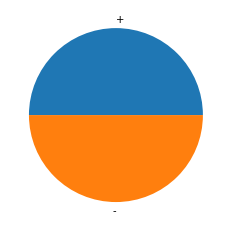

In [9]:
pie_size = [len(pos_twts), len(neg_twts)]
plt.pie(pie_size, labels = ['+', '-'])
plt.show()

From the pie chart above we can see that the number of + and - tweets are equal. 
Now we know the size of the tweets what about the texts? what are the charactors in the text? For this reason, I am going to look at one of sentences from each of + and - tweets. 

In [17]:
print('One positive tweet sample')
print('\033[90m' + pos_twts[random.randint(0,5000)])
print('\n')
print('One negative tweet sample')
print('\033[91m' + neg_twts[random.randint(0,5000)])

One positive tweet sample
@remylauren Im hopefully home in April for a few weeks :):):)


One negative tweet
@princessviki13 you're welcome - Shane you don't do online sessions :(


***
As we see the tweets includes some marks like @ and # and sometimes hyper links. Before analyzing the tweets we need to take important steps. These steps are:

--Tokenizing the strings:
We break the string into smaller chunks

--Lowercasing the words:
Some words are in uppercase and lowercase formats. We need to make the words unify interms of upper/lower case words.

--Removing the stop words:
The stop words are commonly used words such as "is", "are", "the", and etc. 

--Stemming:
We will find the family of the words and unify them. As examples:
am, are, is $\Rightarrow$ be
car, cars, car's, cars' $\Rightarrow$ car 

**Removing the marks and links ...**

To remove the links and sublinks we use the [re](https://docs.python.org/3/library/re.html) library.

In [71]:
import re

sample_twt = pos_twts[2015]
print('This is the tweet before processing:\n')
print('\033[90m'+ sample_twt)

# removing the links and marks
twt2 = re.sub(r'^RT[\s]+','', sample_twt)
twt3 = re.sub(r'https?:\/\/.*[\r\n]*', '', twt2)
twt4 = re.sub(r'#', '', twt3)
twt5 = re.sub(r'@', '', twt4)
twt6 = re.sub(r'@', '', twt5)

print('The tweet after the process:\n')
print('\033[89m'+ twt6)

This is the tweet before processing:

when u r obsessed with OTH and watching the whole show for a third time  :)))) 💗
The tweet after the process:

when u r obsessed with OTH and watching the whole show for a third time  :)))) 💗


**Tokenizing**
This is down by employing the [tokenizer](https://www.nltk.org/api/nltk.tokenize.html)

In [72]:
from nltk.tokenize import word_tokenize
from nltk.tokenize import TweetTokenizer

nltk.download('punkt')

print('\033[92m')
print('The Tweet before tokenizing:')
print(twt6)

# start the tokenizer
#tokenizer = TweetTokenizer(preserve_case=Flase, strip_handlres=True, reduce_len=True)

tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True, reduce_len=True)
twt_tokened = tokenizer.tokenize(twt6)

print('\033[94m')
print('\nTokenized tweet:')
print(twt_tokened)


The Tweet before tokenizing:
when u r obsessed with OTH and watching the whole show for a third time  :)))) 💗


Tokenized tweet:
['when', 'u', 'r', 'obsessed', 'with', 'oth', 'and', 'watching', 'the', 'whole', 'show', 'for', 'a', 'third', 'time', ':)', ')', ')', '💗']


[nltk_data] Downloading package punkt to /home/mn/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


**Removing the stop words**


In [73]:
nltk.download('stopwords')

import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

stop_wrds_en = stopwords.words('english')

print('list of stop words:')
print(stop_wrds_en)

print('\nPunctuations:')
print(string.punctuation)

list of stop words:
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'sa

[nltk_data] Downloading package stopwords to /home/mn/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [74]:
print('\033[94m')
print('\nTokenized tweet:')
print(twt_tokened)

clean_twt = []

for word in twt_tokened:
    if (word not in stop_wrds_en and word not in string.punctuation):
        clean_twt.append(word)

print('\033[90m')
print('clean tweet:')
print(clean_twt)



Tokenized tweet:
['when', 'u', 'r', 'obsessed', 'with', 'oth', 'and', 'watching', 'the', 'whole', 'show', 'for', 'a', 'third', 'time', ':)', ')', ')', '💗']

clean tweet:
['u', 'r', 'obsessed', 'oth', 'watching', 'whole', 'show', 'third', 'time', ':)', '💗']


**Stemming the tweets**

In this process we make the words unify which are in the same family

In [76]:
print('\033[90m')
print('clean tweet:')
print(clean_twt)

stemmer = PorterStemmer()

stemed_twt = []

for word in clean_twt:
    word_stemmed = stemmer.stem(word)
    stemed_twt.append(word_stemmed)
    
print('Stemmed words:')
print(stemed_twt)


clean tweet:
['u', 'r', 'obsessed', 'oth', 'watching', 'whole', 'show', 'third', 'time', ':)', '💗']
Stemmed words:
['u', 'r', 'obsess', 'oth', 'watch', 'whole', 'show', 'third', 'time', ':)', '💗']


In this Jupyter Notebook the tweets were processed which stop words are removed, strings are tokenized, words are changed into lower cases, and finally the words are stemmed.